# Exploratory Data Analysis of Crimes in Vancouver

<p> This is a general EDA of crimes in Vancouver, BC, Canada through the years 2003 to 2017. The data is from the <a href = "https://data.vancouver.ca/datacatalogue/crime-data.htm">Vancouver Open Data Catalogue</a>. The main purpose of this analysis is to get a visual idea of the trend and change in crime throughout the years. </p>

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import folium
from folium.plugins import HeatMap



In [2]:
data = pd.read_csv('crime.csv')
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530652 entries, 0 to 530651
Data columns (total 12 columns):
TYPE             530652 non-null object
YEAR             530652 non-null int64
MONTH            530652 non-null int64
DAY              530652 non-null int64
HOUR             476290 non-null float64
MINUTE           476290 non-null float64
HUNDRED_BLOCK    530639 non-null object
NEIGHBOURHOOD    474028 non-null object
X                530652 non-null float64
Y                530652 non-null float64
Latitude         530652 non-null float64
Longitude        530652 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 48.6+ MB


<h4>Let's transform the date from object to a datetime and change the index to a date</h4>

In [4]:
data['DATE'] = pd.to_datetime({'year':data['YEAR'], 'month':data['MONTH'], 'day':data['DAY']})
data.index = pd.DatetimeIndex(data['DATE'])

<h4>Check the types of crimes</h4>

In [5]:
data['TYPE'].value_counts()

Theft from Vehicle                                        172700
Mischief                                                   70413
Break and Enter Residential/Other                          60862
Offence Against a Person                                   54142
Other Theft                                                52167
Theft of Vehicle                                           38418
Break and Enter Commercial                                 33845
Theft of Bicycle                                           25730
Vehicle Collision or Pedestrian Struck (with Injury)       21901
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Homicide                                                     220
Name: TYPE, dtype: int64

<h4> We will look at the portion of each type of crime that contributes to the total count.  
    </h4>

In [6]:
total_types = x = data['TYPE'].value_counts().rename_axis('type').reset_index(name='counts')
total_types['counts'].tolist()

[172700, 70413, 60862, 54142, 52167, 38418, 33845, 25730, 21901, 254, 220]

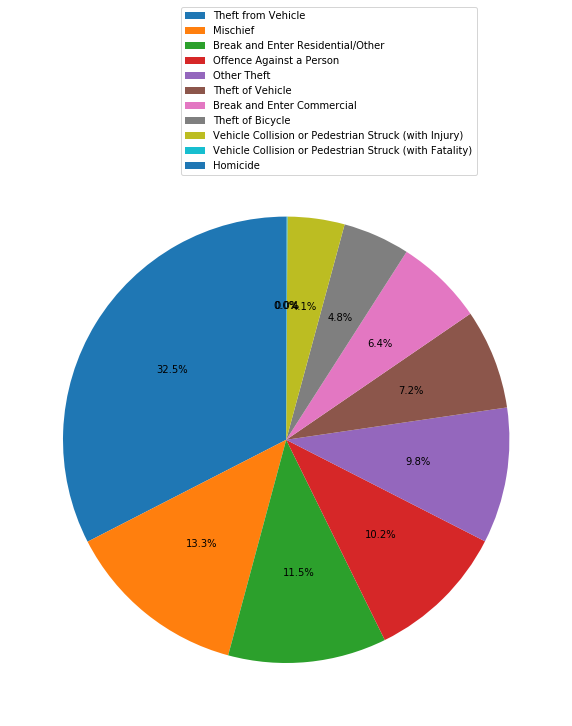

In [7]:
plt.figure(figsize=(10,20))

plt.pie(total_types['counts'].tolist(),autopct='%1.1f%%'
       ,startangle=90,)
plt.legend(labels=total_types['type'].tolist(),loc='right',bbox_to_anchor=(0.85,1.125))

<h4>As shown above, a large portion of the crimes is under some kind of 'theft'. We will explore that later, for now we will group these crimes into the following categories:
    <ul>
        <li>Theft</li>
        <li>Break and Enter</li>
        <li>Offence Against Person</li>
        <li>Mischief</li>
        <li>Homicide</li>
            </ul>
                </h4>

In [8]:
def cat(crime):
    if 'Theft' in crime: 
        return 'Theft'
    elif 'Break' in crime: 
        return 'Break and Enter'
    elif 'Collision' in crime: 
        return 'Vehicle Collision'
    elif 'Offence' in crime:
        return 'Offence Against Person'
    elif 'Mischief' in crime: 
        return 'Mischief'
    else:
        return 'Homicide'

In [10]:
data['CRIME CATEGORY'] = data['TYPE'].apply(cat)
data['CRIME CATEGORY'].value_counts()

Theft                     289015
Break and Enter            94707
Mischief                   70413
Offence Against Person     54142
Vehicle Collision          22155
Homicide                     220
Name: CRIME CATEGORY, dtype: int64

<h4>
    We will now look at the total number of counts of each type of crime per day by resample the dataset. 
</h4>

<h2>Theft</h2>

Text(0.5, 1.0, 'Theft')

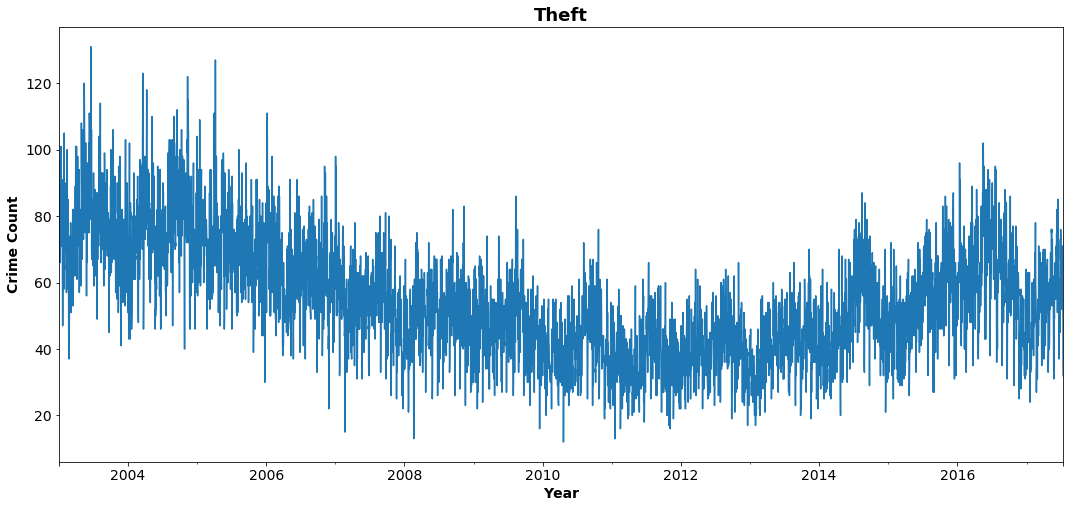

In [49]:
plt.figure(figsize=(18,8))
data[data['CRIME CATEGORY'] == 'Theft'].resample('D').size().plot(fontsize=14)
plt.ylabel('Crime Count',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=14,fontweight='bold')
plt.title('Theft',fontsize=18,fontweight='bold')

<ul>
<li>The counts of theft have had a general decrease from 2003 to 2010, and then a gradual increase till 2019. 
    </li>
</ul>

<h2>Break and Enter</h2>

Text(0.5, 1.0, 'Break and Enter')

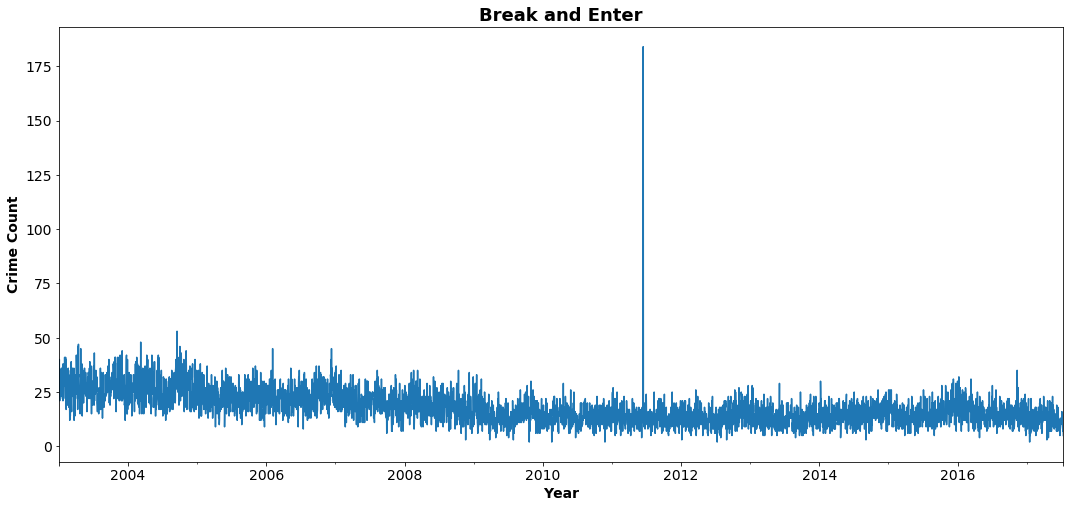

In [51]:
plt.figure(figsize=(18,8))
data[data['CRIME CATEGORY'] == 'Break and Enter'].resample('D').size().plot(fontsize=14)
plt.ylabel('Crime Count',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=14,fontweight='bold')
plt.title('Break and Enter',fontsize=18,fontweight='bold')

<ul>
    <li>
        The total number of break and enters have been steady with a slight decrease towards 2019, however there is a huge spike between 2010 and 2012, which will investigate further. 
    </li>
    </ul>



In [175]:
data[data['CRIME CATEGORY']== 'Break and Enter'].resample('D').size().idxmax()

Timestamp('2011-06-15 00:00:00', freq='D')

<ul>
    <li>The events of this day will be discussed under the 'Mischief' section.
    </li>
    </ul>

<h2>Mischief</h2>

Text(0.5, 1.0, 'Mischief')

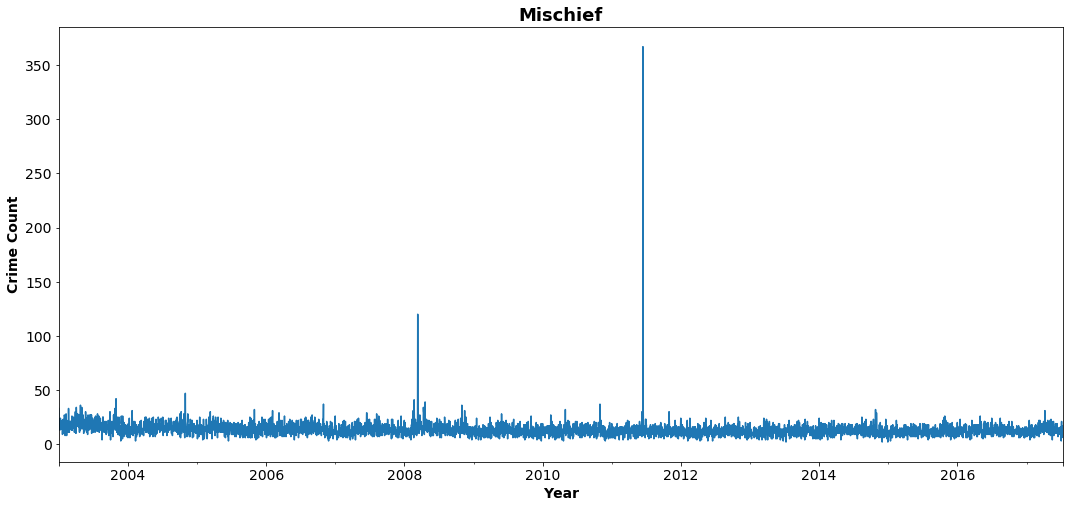

In [52]:
plt.figure(figsize=(18,8))
data[data['CRIME CATEGORY'] == 'Mischief'].resample('D').size().plot(fontsize=14)
plt.ylabel('Crime Count',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=14,fontweight='bold')
plt.title('Mischief',fontsize=18,fontweight='bold')

<ul>
    <li>
        The counts of mischief have been at a steady value below 50 per day, except a spike during 2008 and another between 2011 to 2012. We will investigate these further.
    </li>
    </ul>

In [54]:
data[data['CRIME CATEGORY'] == 'Mischief'].resample('D').size().idxmax()

Timestamp('2011-06-15 00:00:00', freq='D')

In [55]:
data['2011-06-15']['CRIME CATEGORY'].value_counts()

Mischief                  367
Break and Enter           184
Theft                      61
Offence Against Person     35
Vehicle Collision           2
Name: CRIME CATEGORY, dtype: int64

In [56]:
data_mis = data[data['CRIME CATEGORY'] == 'Mischief']
data_mis_08 = data_mis[data_mis['YEAR'] == 2008]
data_mis_08.resample('D').size().idxmax()

Timestamp('2008-03-12 00:00:00', freq='D')

In [91]:
data['2008-03-12']['CRIME CATEGORY'].value_counts()

Mischief                  120
Theft                      62
Break and Enter            17
Offence Against Person     14
Vehicle Collision           1
Name: CRIME CATEGORY, dtype: int64

<h3>Day 1: 12th March 2008
    </h3>
    <p>On this day, there were 120 counts of mischief. This seems strange as 103 of these arrests were in the neighbourhood 'Renfrew-Collingwood </p>

In [87]:
map_c = folium.Map(location=[49.2445,-123.0422],zoom_start=13)

In [89]:
HeatMap(data_mis_08['2008-03-12'].iloc[0:,-4:-2]).add_to(map_c)

If we zoom into the map, we can see that there are too many arrests of mischief, around random streets and schools. According to a google news search between the dates 2008-03-12 and 2008-03-15, there were no major news worth mentioning to the media. This could mean that there was either an error during the input of the data or that the arrests were classified and not disclosed to the general public. Regardless, it would be an interesting question to ask the city. 

In [90]:
map_c

<h3>
    Day 2: 15th June 2011
    </h3>

<p>On 15th June 2011, the Vancouer Canucks' los the Stanley Cup Finals to the Boston Bruins. This resulted in a violent riot which included small fires, destruction of property in downtown Vancouver according to <a href = 'https://seattle.sbnation.com/vancouver-canucks/2011/6/15/2226505/vancouver-riots-photos-police-tear-gas-stanley-cup-finals'> source </a>. This can explain why there were high number of arrests that day, proving the anomaly.
    </p>

<h2>
    Offence Against Person
    </h2>

Text(0.5, 1.0, 'Offence Against Person')

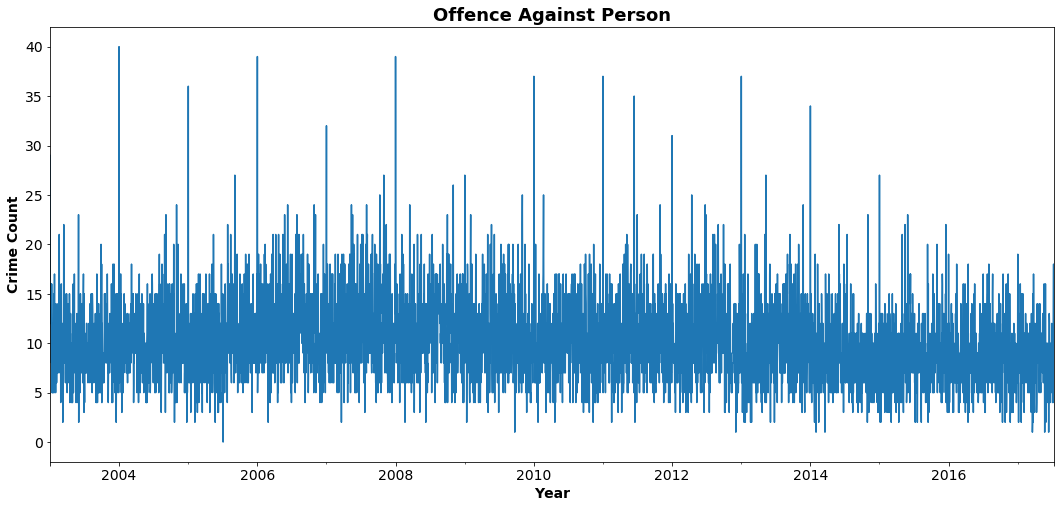

In [92]:
plt.figure(figsize=(18,8))
data[data['CRIME CATEGORY'] == 'Offence Against Person'].resample('D').size().plot(fontsize=14)
plt.ylabel('Crime Count',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=14,fontweight='bold')
plt.title('Offence Against Person',fontsize=18,fontweight='bold')



<ul>
    <li>We can see frequent spikes every year which may suggest that there is a particular month where there are higher counts of offence against person per day. 
    </li>
    </ul>

In [108]:
# We are excluding 2017 because the datasat was created in 2017 so it only has Jan-Jul for that particular year
monthly_oap = data[data['CRIME CATEGORY'] == 'Offence Against Person'].resample('M').size().tolist()
monthly = {'2003': monthly_oap[0:12],
           '2004': monthly_oap[12:24],
           '2005': monthly_oap[24:36],
           '2006': monthly_oap[36:48],
           '2007': monthly_oap[48:60],
           '2008': monthly_oap[60:72],
           '2009': monthly_oap[72:84],
           '2010': monthly_oap[84:96],
           '2011': monthly_oap[96:108],
           '2012': monthly_oap[108:120],
           '2013': monthly_oap[120:132],
           '2014': monthly_oap[132:144],
           '2015': monthly_oap[144:156],
           '2016': monthly_oap[156:168]}



In [109]:
monthly_data = pd.DataFrame(monthly)
monthly_data['Month'] = list(range(1,13))
monthly_data.set_index('Month',inplace=True)

<h3>Total number of crimes under 'Offence Against Person' per month </h3>

In [110]:
monthly_data

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Month,,,,,,,,,,,,,,
1,338,326,305,380,377,374,349,314,347,310,286,278,279,271
2,280,282,272,332,291,337,289,322,265,287,243,236,210,237
3,315,347,298,358,366,343,286,307,301,295,323,286,248,256
4,240,310,280,350,358,315,337,279,300,298,286,257,223,251
5,290,274,313,378,392,363,333,318,386,319,311,297,312,265
6,311,311,292,359,355,334,312,330,314,354,289,303,298,240
7,277,309,328,389,403,375,346,356,358,306,349,283,272,308
8,299,368,356,416,423,396,365,315,330,379,355,258,268,319
9,266,337,344,350,340,365,324,298,311,358,314,229,242,247


In [116]:
monthly_data.idxmax(axis=0)

2003    1
2004    8
2005    8
2006    8
2007    8
2008    8
2009    8
2010    7
2011    5
2012    8
2013    8
2014    6
2015    5
2016    8
dtype: int64

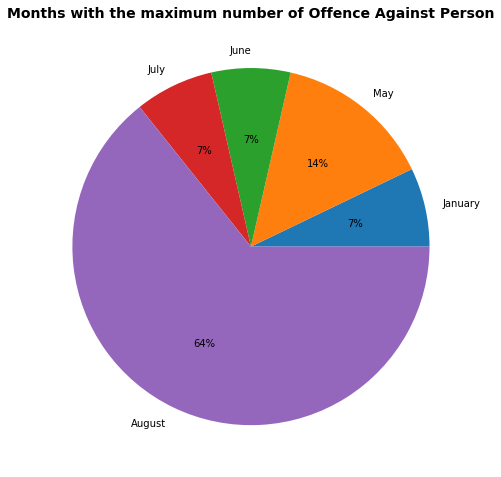

In [120]:
# months: ['January','May','June','July','August']
# counts: [1,2,1,1,9]
plt.figure(figsize=(8,20))
plt.pie([1,2,1,1,9],labels=['January','May','June','July','August'],autopct='%.0f%%')
plt.title('Months with the maximum number of Offence Against Person',fontsize=14,fontweight='bold')
plt.show()

<ul>
    <li>As shown here, August has the highest number of offences against people throughout the years 2003 to 2016. This can explain why there are frequent peaks in the daily graph. 
    </li>
    </ul>

<h2>Vehicle Collision
    </h2>

Text(0.5, 1.0, 'Vehicle Collision')

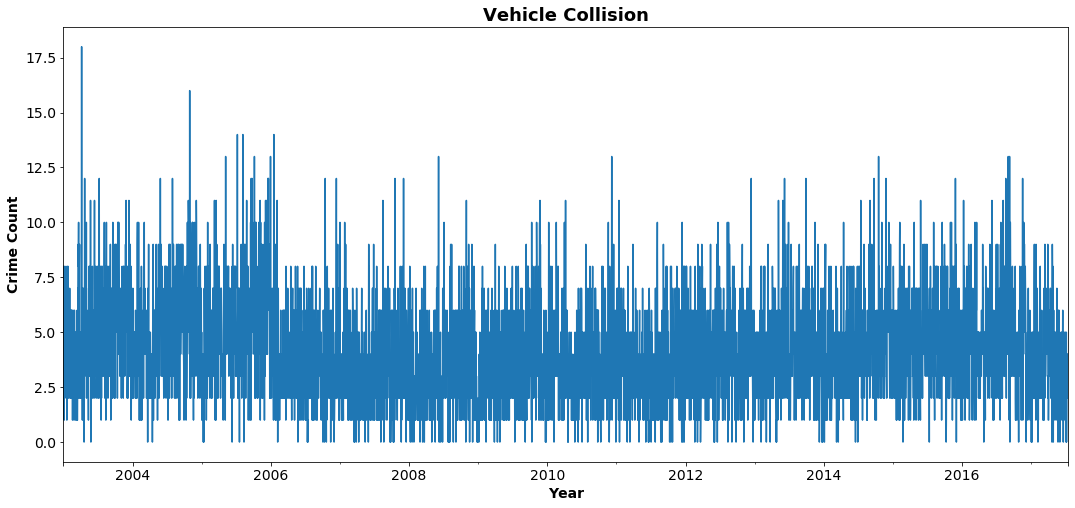

In [121]:
plt.figure(figsize=(18,8))
data[data['CRIME CATEGORY'] == 'Vehicle Collision'].resample('D').size().plot(fontsize=14)
plt.ylabel('Crime Count',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=14,fontweight='bold')
plt.title('Vehicle Collision',fontsize=18,fontweight='bold')



<ul>
    <li>
        Vehicle collision also seems to have frequent spikes which also may suggest that there are particular month(s) or location(s) where this crime is occuring more frequently.
    </li>
    </ul>

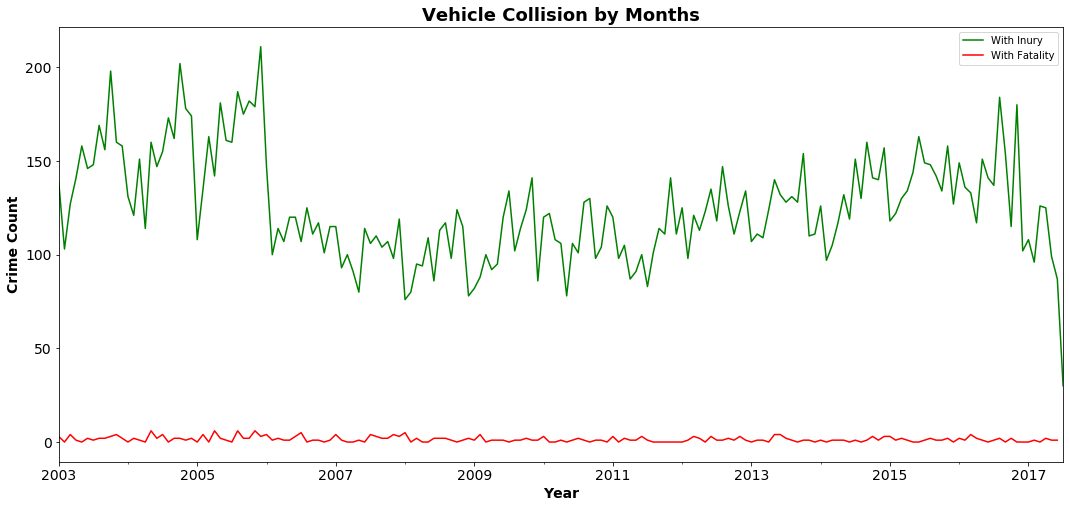

In [144]:
plt.figure(figsize=(18,8))
data[data['TYPE'] == 'Vehicle Collision or Pedestrian Struck (with Injury)'].resample('M').size().plot(fontsize=14,color='green',label=
                                                                                                      'With Inury')
data[data['TYPE'] == 'Vehicle Collision or Pedestrian Struck (with Fatality)'].resample('M').size().plot(fontsize=14,color='red',label='With Fatality')
plt.ylabel('Crime Count',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=14,fontweight='bold')
plt.title('Vehicle Collision by Months',fontsize=18,fontweight='bold')
plt.legend()

<ul>
    <li>
        As we can see vehicle collisions with fatality are at a steady frequency per month, whereas vehicle collisions with injury have decreased slightly from 2016 to 2017. 
    </li>
    </ul>

<h2>
    Homicide
    </h2>



Text(0.5, 1.0, 'Homicide')

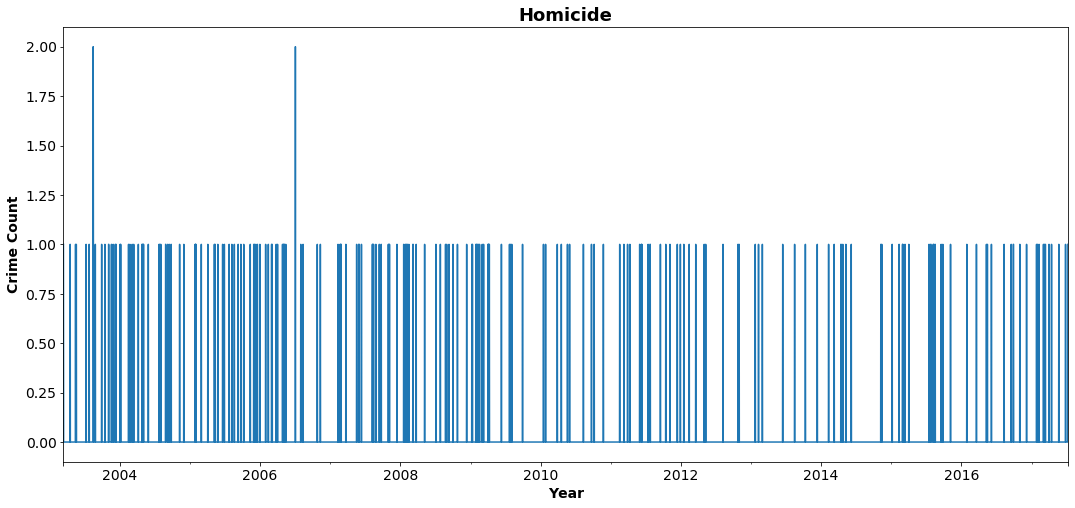

In [127]:
plt.figure(figsize=(18,8))
data[data['CRIME CATEGORY'] == 'Homicide'].resample('D').size().plot(fontsize=14)
plt.ylabel('Crime Count',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=14,fontweight='bold')
plt.title('Homicide',fontsize=18,fontweight='bold')

<ul>
    <li>
        Homicide is at a steady 1 per day or 0 per day except for two instance where there were 2 per day. We will analyse this further by resampling the data. 
    </li>
    </ul>

Text(0.5, 1.0, 'Homicides per month')

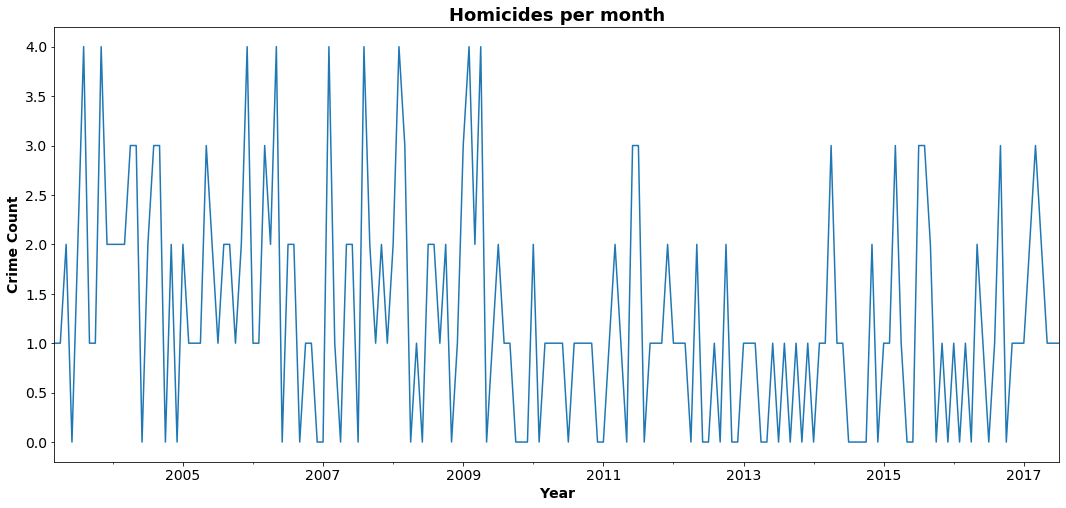

In [147]:

plt.figure(figsize=(18,8))
data[data['CRIME CATEGORY'] == 'Homicide'].resample('M').size().plot(fontsize=14)
plt.ylabel('Crime Count',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=14,fontweight='bold')
plt.title('Homicides per month',fontsize=18,fontweight='bold')


<ul>
    <li>The number of homocides per month ranges between 0 to 4, and as shown above, in certain months there are 4 counts and in some there are less. However, we cannot see an obvious pattern and since the difference is so miniscual and locations are not disclosed, we will not be investigating this any further. 
    </li>
    </ul>


<h2>
    Conclusion
    </h2>
    

To summarize, the scope of crime in Vancouver throughout 2003 to 2017 consists mostly of theft,break and enter and mischief, whereas homicide has very low counts. While it is reassuring to know that there are less homicides occuring, it is still slighlty concerning that the number of thefts is so alarmingly high. For further investigation, it would be useful to have climate data for the city during those dates as that could be used to justify why during certain months (usually warmer) it is more common for crimes such as 'offence against person'. 